# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## Logistic Regression

<hr/>

### Sigmoid 함수

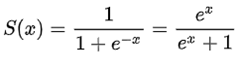
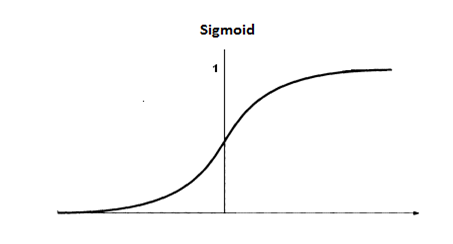

<br/><br/>

### H(x)는 sigmoid 함수를 통해 0과 1에 근사하도록 만든다
### Cost함수와 경사하강법을 통한 학습

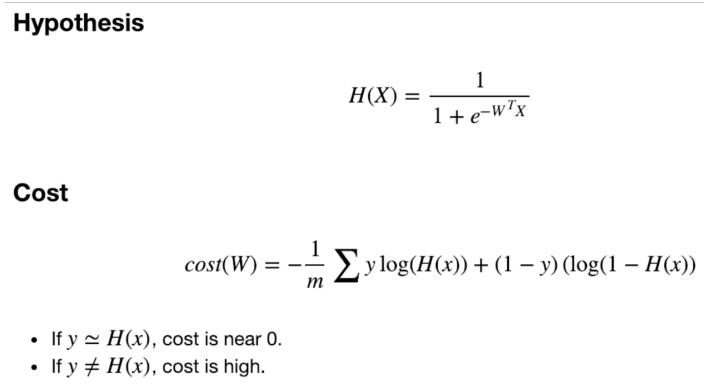
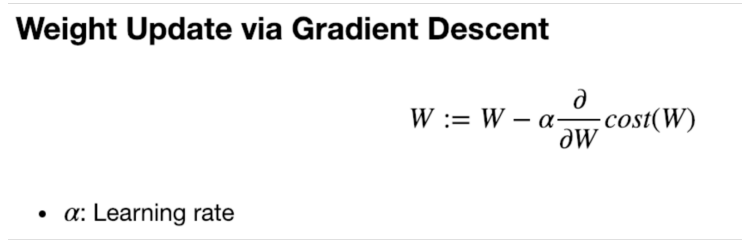

<br/><br/>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 재현성(Reproducibility)을 위해 시드를 설정
torch.manual_seed(1)

In [46]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]  # 6 x 2
y_data = [[0], [0], [0], [1], [1], [1]]                    # 6 x 1

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


<br/>

### H(x)를 구현

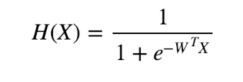

위 식은 다음과 같이 표현할 수 있다.

$$H(x)= \frac{1}{1 + e^-X·W}$$

- `x_train.matmul(W)`로 **X·W** 내적을 표현할 수 있다

In [7]:
print("e^1 equals:", torch.exp(torch.FloatTensor([1])))

e^1 equals: tensor([2.7183])


In [10]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


<br/>

- torch에서 제공하는 torch.sigmoid 사용

In [11]:
print("sigmoid")
print("1/(1+e^(-1)) equals:", torch.sigmoid(torch.FloatTensor([1])))

sigmoid
1/(1+e^(-1)) equals: tensor([0.7311])


In [12]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])


<br/>

### Cost Function 계산

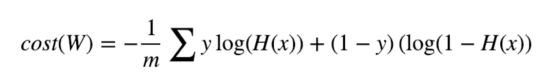

In [13]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [14]:
-(y_train[0] * torch.log(hypothesis[0]) + 
 (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [15]:
losses = -(y_train * torch.log(hypothesis) + 
         (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [16]:
cost = losses.mean()  # 평균
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


<br/>

#### cost 공식을 간단하게 계산하는 방법
- `torch.nn.functional` 라이브러리에서 제공하는 `binary_cross_entropy()`함수 사용

In [17]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

<br/>

### 정리

In [38]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1)

epochs = 1000
for epoch in range(epochs + 1):
    # H(x)
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    
    # Cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


<br/>

### 정확도 평가(Evaluation)

In [39]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward0>)


In [40]:
# 0.5 보다 크면 True를 반환
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])


<br/>

### 실제값과 예측값을 비교해보자

In [34]:
print(prediction[:5])
print(y_train[:5])

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [36]:
# 얼마나 맞았는지 채점
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


<br/>

### Higher Implementation with Class

- 실전에서 구현한다면 다음과 같은 형태를 많이 사용
- self.linear는 {W, b}를 가지고 있다.

#### real data를 통해 학습을 실행

In [48]:
import torch.nn as nn

class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [58]:
# 데이터 (real data)
import numpy as np
xy = np.loadtxt('data/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# 모델 초기화
model = BinaryClassifier()

# optimizer 생성
optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 100
for epoch in range(epochs + 1):
    # H(x)
    hypothesis = model(x_train)
    
    # Cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    # Cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 10번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, epochs, cost.item(), accuracy * 100
        ))

Epoch    0/100 Cost: 0.713565 Accuracy 43.35%
Epoch   10/100 Cost: 0.582418 Accuracy 66.93%
Epoch   20/100 Cost: 0.543635 Accuracy 71.81%
Epoch   30/100 Cost: 0.521667 Accuracy 75.63%
Epoch   40/100 Cost: 0.508096 Accuracy 76.55%
Epoch   50/100 Cost: 0.499134 Accuracy 76.81%
Epoch   60/100 Cost: 0.492917 Accuracy 76.42%
Epoch   70/100 Cost: 0.488446 Accuracy 76.28%
Epoch   80/100 Cost: 0.485139 Accuracy 76.55%
Epoch   90/100 Cost: 0.482639 Accuracy 76.28%
Epoch  100/100 Cost: 0.480716 Accuracy 76.68%
